In [3]:
import tarfile
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# extracting the data

In [3]:
# # Extract the tar file -- Only need to run this once
# with tarfile.open(file_path, 'r') as tar:
#     tar.extractall(path="yelp_review_extract")


In [1]:

with open("../data/yelp_dataset/yelp_academic_dataset_review.json", "r", encoding="utf-8") as file:
    data = [json.loads (line) for line in file]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)



#  Filtering the DF by frequent users

In [ ]:
# Group by user_id and get the count of occurrences
user_counts = df.groupby('user_id').size().reset_index(name='number_of_reviews')

user_counts = user_counts.sort_values(by= 'number_of_reviews', ascending = False)

user_counts.head(20)

,user_id,number_of_reviews
1156280,_BcWyKQL16ndpBdggh2kNA,3048
1086212,Xw7ZjaGfr0WNVt6s_5KZfA,1840
40750,0Igx-a1wAstiBDerGxXk2A,1747
8316,-G7Zkl1wIWBBmD0KRy_sCw,1682
481650,ET8n-r7glWYqZhuR6GcdNw,1653
1228917,bYENop4BuQepBjM1-BI3fA,1578
71302,1HM81n6n4iPIFU5d2Lokhw,1554
1363417,fr1Hz2acAb3OaL3l6DyKNg,1447
1880458,wXdbkFZsfDR7utJvbWElyA,1396
988614,Um5bfs5DH6eizgjH3xZsvg,1391


In [ ]:
#filtering df and will write to csv later
user_counts_10_plus = user_counts[user_counts['number_of_reviews'] >= 10]

user_counts_10_plus

,user_id,number_of_reviews
1156280,_BcWyKQL16ndpBdggh2kNA,3048
1086212,Xw7ZjaGfr0WNVt6s_5KZfA,1840
40750,0Igx-a1wAstiBDerGxXk2A,1747
8316,-G7Zkl1wIWBBmD0KRy_sCw,1682
481650,ET8n-r7glWYqZhuR6GcdNw,1653
...,...,...
250587,72GUuDr26AQpG-04_K3FIg,10
1522993,kzn8yp8k_jBLHb8thdCkyA,10
72157,1JAr8W1kSdDsVCIE7B6GKw,10
1923520,xudItvqWCVJsDzk1qqo5JA,10


# Creating a histogram to show distribution of frequent reviewers 

In [ ]:
#grouping buy number of reviews so I see how many people left 20 reviews, 21 reviews, and so on

review_number_count = user_counts.groupby('number_of_reviews').size().reset_index(name='number_of_people')

review_number_count = review_number_count.sort_values(by= 'number_of_people', ascending = False)

review_number_count

,number_of_reviews,number_of_people
0,1,1136008
1,2,321591
2,3,153935
3,4,89279
4,5,58921
...,...,...
448,478,1
451,482,1
453,484,1
455,492,1


In [ ]:
#filtering to 10 or more reviews

ten_plus_reviews = review_number_count[review_number_count['number_of_reviews']>=10]

x = ten_plus_reviews['number_of_people'].sum()

print(f'the number of people with 10 or more reviews is {x}')

ten_plus_reviews

the number of people with 10 or more reviews is 117370


,number_of_reviews,number_of_people
9,10,14119
10,11,11538
11,12,9609
12,13,8013
13,14,6793
...,...,...
448,478,1
451,482,1
453,484,1
455,492,1


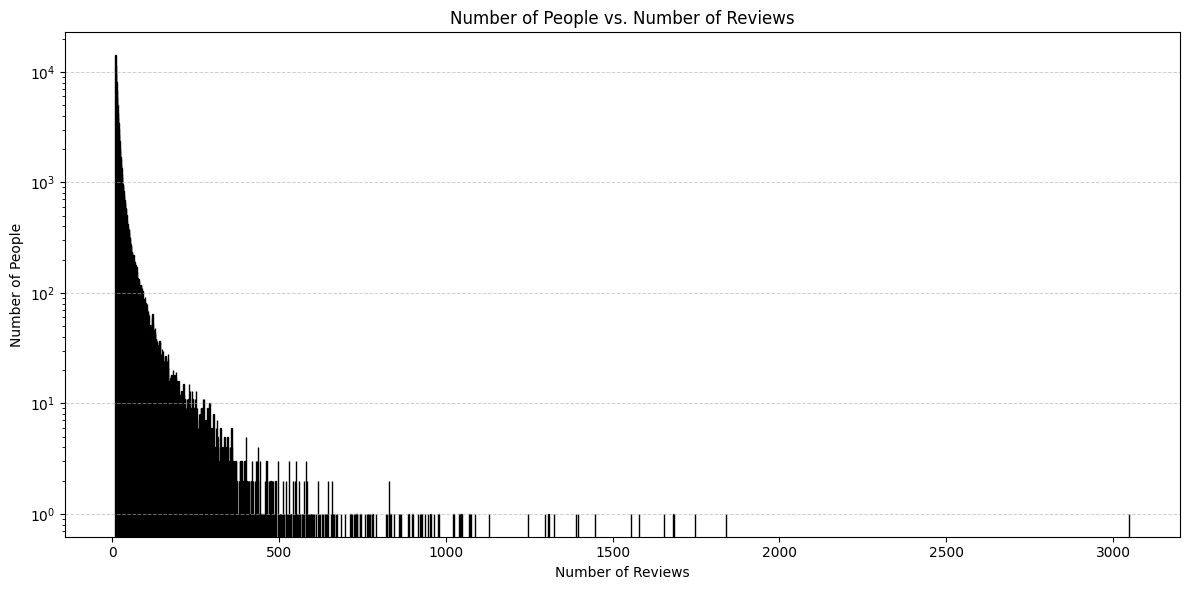

In [ ]:

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(ten_plus_reviews['number_of_reviews'], ten_plus_reviews['number_of_people'], color='skyblue', edgecolor='k')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of People')
plt.title('Number of People vs. Number of Reviews')
plt.yscale('log')  # Using a logarithmic scale for better visualization given the range of values
#plt.xticks(df['number_of_reviews'])  # Set x-ticks to be explicitly based on the data for clarity
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

# Creating a CSV file for reviews from users who wrote 10 or more reviews

In [8]:
filtered_reviews = df[df['user_id'].isin(user_counts_10_plus['user_id'])]

df_frequent_reviewers = filtered_reviews


df_frequent_reviewers 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
3,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5.0,2.0,0.0,0.0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.0,0.0,0.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
...,...,...,...,...,...,...,...,...,...
3303808,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4.0,3.0,0.0,2.0,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03
3303809,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20
3303810,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30
3303811,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


# loading in the business data set and merging relevant data



In [8]:
#opening the business data set so that I can get data on the location for each business


with open("../data/yelp_dataset/yelp_academic_dataset_business.json", "r", encoding="utf-8") as file:
    data_business = [json.loads (line) for line in file]

df_business = pd.DataFrame(data_business)


# deleting stars column because the reviews data set already has the star rating
del df_business['stars']

pd.set_option('display.max_colwidth', None)

df_business.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsAttire': 'u'casual'', 'OutdoorSeating': 'True', 'RestaurantsReservations': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'Alcohol': 'u'none'', 'Ambience': 'None', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'ByAppointmentOnly': 'False', 'CoatCheck': 'False', 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': 'u'no'', 'WheelchairAccessible': 'True', 'HasTV': 'True', 'HappyHour': 'False', 'DriveThru': 'True', 'BikeParking': 'False'}","Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', 'Wednesday': '6:0-22:0', 'Thursday': '6:0-22:0', 'Friday': '9:0-0:0', 'Saturday': '9:0-22:0', 'Sunday': '8:0-22:0'}"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Re

In [11]:
# merging the data frames

df_business_reviews = pd.merge(df_business, df_frequent_reviewers, how='inner', on= 'business_id')


In [16]:
# Group by 'user_id' and count the number of posts for each user
post_counts = df_business_reviews.groupby('user_id').size()

# Filter the users with fewer than 10 posts
users_below_threshold = post_counts[post_counts < 10]

# Display the number of such users
print("Number of users with fewer than 10 posts:", len(users_below_threshold))

# print user_ids if there are users below threshold
print(users_below_threshold.index)

Number of users with fewer than 10 posts: 0
Index([], dtype='object', name='user_id')


# Filtering for CA

In [ ]:
# Counting occurrences of each state
state_counts = df_business_reviews['state'].value_counts().reset_index()

# Renaming the columns for clarity
state_counts.columns = ['state', 'number_of_appearances']

state_counts.head(10)

,state,number_of_appearances
0,PA,852355
1,FL,552448
2,LA,304001
3,IN,272741
4,MO,253594
5,TN,253576
6,AZ,208817
7,NV,200224
8,NJ,122045
9,CA,102982


In [ ]:
cal_df = df_business_reviews[df_business_reviews['state'] == 'CA']

# Counting occurrences of each state
city_counts_CA = cal_df['city'].value_counts().reset_index()

# Renaming the columns for clarity
city_counts_CA.columns = ['city', 'number_of_appearances']

city_counts_CA

,city,number_of_appearances
0,Santa Barbara,77090
1,Goleta,16467
2,Carpinteria,4459
3,Isla Vista,2691
4,Montecito,1478
5,Summerland,628
6,Santa Barbara,58
7,Truckee,19
8,Santa Barbra,16
9,Mission Canyon,12


# Filtering for california

In [25]:
df_business_reviews_CA = df_business_reviews[df_business_reviews['state'] == 'CA']

# Group by 'user_id' and count the number of posts for each user
post_counts = df_business_reviews_CA.groupby('user_id').size()

# Filter the users with fewer than 10 posts
users_below_threshold = post_counts[post_counts < 10].index

# Remove these users from the dataframe.  df_business_reviews_CA_filtered contains only the users who have 10 or more posts
df_business_reviews_CA_filtered = df_business_reviews_CA[~df_business_reviews_CA['user_id'].isin(users_below_threshold)]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


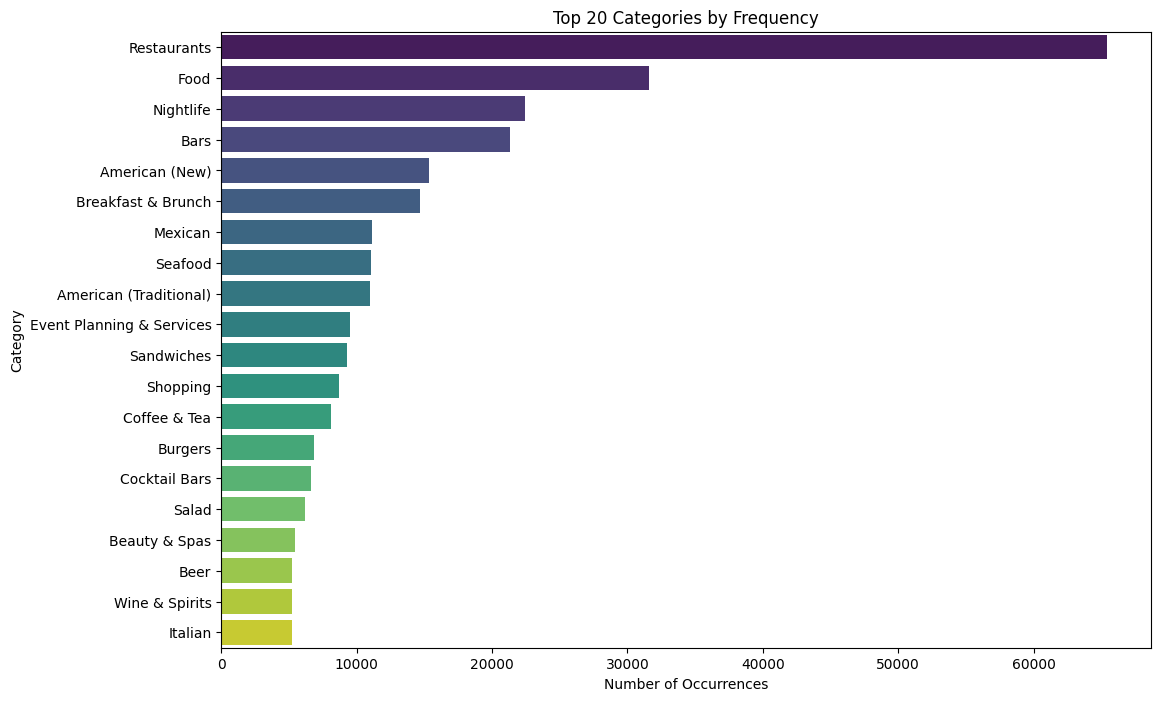

In [28]:


df = df_business_reviews_CA_filtered 


# Split the 'category' column and stack it to create a single column of words
categories = df['categories'].str.split(', ', expand=True).stack()

# Count the occurrences of each word/category
category_counts = categories.value_counts()

# Plotting the top N categories. Let's say top 20 for this example.
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.head(top_n).values, y=category_counts.head(top_n).index, palette="viridis")
plt.title('Top 20 Categories by Frequency')
plt.xlabel('Number of Occurrences')
plt.ylabel('Category')
plt.show()


# what data is collected for non-resturaunts?

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


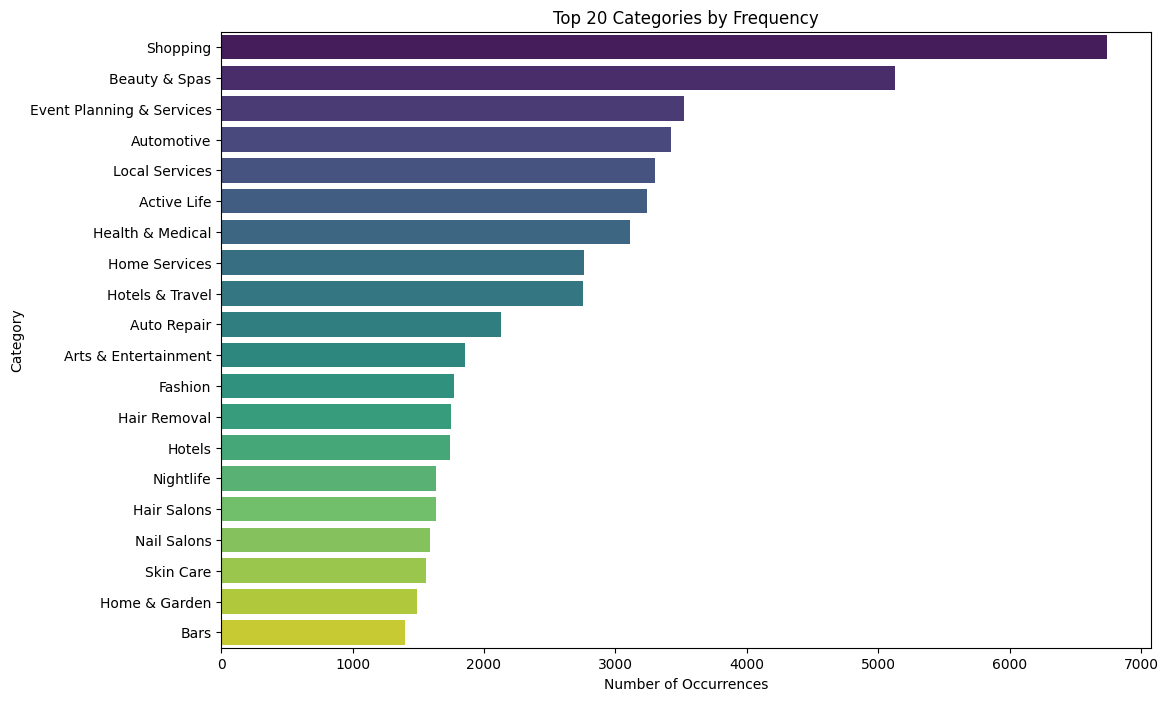

In [29]:
df2 = df[~df['categories'].str.contains('Restaurants|Food', na=False)]

# Split the 'category' column and stack it to create a single column of words
categories = df2['categories'].str.split(', ', expand=True).stack()

# Count the occurrences of each word/category
category_counts = categories.value_counts()

# Plotting the top N categories. Let's say top 20 for this example.
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.head(top_n).values, y=category_counts.head(top_n).index, palette="viridis")
plt.title('Top 20 Categories by Frequency')
plt.xlabel('Number of Occurrences')
plt.ylabel('Category')
plt.show()